In [2]:
import pandas as pd

In [3]:
nciDF = pd.read_csv('NCI-HistoricalData_1656158319588.csv', parse_dates = ['Date'], infer_datetime_format=True)

In [4]:
nciDF['strDate'] = nciDF['Date'].dt.strftime('%Y-%m-%d')
nciDF.set_index('strDate', drop=True, inplace=True)
nciDF.rename(columns={'Close/Last':'NCI'}, inplace=True)
df1 = nciDF[['NCI']]

In [5]:
btcDF = pd.read_csv('Historical-BTCUSDT-Binance.csv', parse_dates = ['open_time', 'close_time'], infer_datetime_format=True)

In [6]:
btcDF['strDate'] = btcDF['open_time'].dt.strftime('%Y-%m-%d')
btcDF.set_index('strDate', drop=True, inplace=True)
btcDF.rename(columns={'close':'BTC'}, inplace=True)
df2 = btcDF[['BTC']].sort_values('strDate')
df2['BTC'] = 1000*(df2['BTC']/(df2['BTC'][0]))
df2

,BTC
strDate,
2020-12-01,1000.000000
2020-12-02,1023.401595
2020-12-03,1035.008868
2020-12-04,993.901399
2020-12-05,1020.394395
...,...
2022-06-20,1096.399353
2022-06-21,1104.373257
2022-06-22,1065.176265


In [7]:
onnDF = pd.read_csv('Historical-ONN-B-30dW-30dR_2020-12-01_2022-07-01.csv', parse_dates = ['Date'], infer_datetime_format=True)

In [8]:
import datetime
onnDF['strDate'] = onnDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnDF.set_index('strDate', drop=True, inplace=True)
onnDF.rename(columns={'Close':'ONN-B'}, inplace=True)
df3 = onnDF[['ONN-B']]

In [9]:
onnAltDF = pd.read_csv('Historical-ONN-Alt-B-30dW-30dR_2020-12-01_2022-07-01.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnAltDF['strDate'] = onnAltDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnAltDF.set_index('strDate', drop=True, inplace=True)
onnAltDF.rename(columns={'Close':'ONN-Alt-B'}, inplace=True)
df4 = onnAltDF[['ONN-Alt-B']]

In [ ]:
onnVapDF = pd.read_csv('Historical-ONN-Vap-B-30dW-30dR_2020-12-01_2022-07-01.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnVapDF['strDate'] = onnVapDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnVapDF.set_index('strDate', drop=True, inplace=True)
onnVapDF.rename(columns={'Close':'ONN-Vap-B'}, inplace=True)
df5 = onnVapDF[['ONN-Vap-B']]

In [ ]:
onnCategRebal = pd.read_csv('Historical-ONN-CategRebalDaily-B-30dW-30dR_2020-12-01_2022-06-24.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnCategRebal['strDate'] = onnCategRebal['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnCategRebal.set_index('strDate', drop=True, inplace=True)
onnCategRebal.rename(columns={'Close':'ONN-CategRebalDaily-B'}, inplace=True)
df6 = onnCategRebal[['ONN-CategRebalDaily-B']]

In [1]:
df = pd.concat([df1, df2, df3, df4, df5, df6], join='inner', axis=1).sort_values('strDate')
df

,NCI,BTC,ONN-B,ONN-Alt-B,ONN-Vap-B,ONN-CategRebalDaily-B
strDate,,,,,,
2021-04-14,3418.53,3355.164626,3508.16,4144.50,4508.18,8538.820325
2021-04-15,3456.03,3365.846770,3533.50,4272.37,4655.62,9004.412929
2021-04-16,3373.59,3268.581441,3417.68,4292.46,4789.14,9417.615291
2021-04-19,2973.20,2964.735336,3073.44,3853.79,4285.22,8286.006169
2021-04-20,3127.80,3006.934201,3184.18,4044.87,4435.02,8345.499815
...,...,...,...,...,...,...
2022-06-16,1140.81,1087.202424,1087.50,1231.41,1019.38,3591.921906
2022-06-17,1141.91,1090.799554,1097.97,1258.98,1047.74,3677.349766
2022-06-21,1163.13,1104.373257,1126.32,1322.95,1116.49,3966.655655


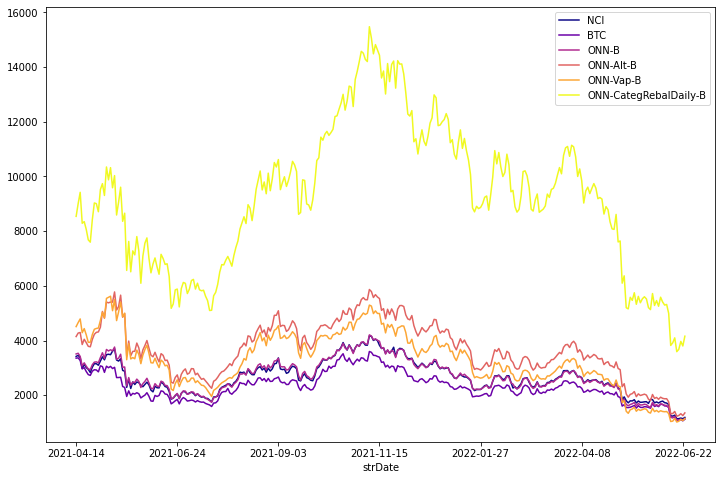

In [14]:
df.plot(figsize=(12,8), colormap='plasma');